# SUP ML 2 - MODEL

# Libraries

In [100]:
import os

# Datos
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
import plotly.express as px
from random import random

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_columns',None)
import pickle
import warnings
warnings.filterwarnings("ignore")

#Tamño default de los plots
plt.rcParams["figure.figsize"] = [10,6]

# Modelos ML de Regresion
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import xgboost as xgb

# Modelos ML de Regresion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier


# Evaluacion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_score
from sklearn import metrics
from xgboost import plot_tree
from scipy.stats import pearsonr


from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

In [53]:
#from google.colab import drive
#drive.mount('/content/drive')

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
CWD = os.getcwd()
DATA_PATH = os.path.join(CWD, "/content/drive/MyDrive/NUCLIO/Machine Learning/Segundo entregable - ML/EJERCICIO-ML-Sup/data")

print(CWD)
print(DATA_PATH)

/content
/content/drive/MyDrive/NUCLIO/Machine Learning/Segundo entregable - ML/EJERCICIO-ML-Sup/data


# Carga clean data

In [56]:
df = pd.read_pickle(os.path.join(DATA_PATH, "df_clean"))

In [57]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,Customer_ID,asl_flag_BOOL,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,ownrent_U,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,creditcd_U,creditcd_Y,area_ENCOD_MID-ATLANTIC,area_ENCOD_MIDWEST,area_ENCOD_NORTHEAST,area_ENCOD_SOUTH,area_ENCOD_SOUTHWEST,area_ENCOD_WEST
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272.0,116.0,30.0,322.0,136.0,38.0,149.98999,2,2,15,1,4,3,361,1000001,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305.0,158.0,40.0,477.0,275.0,48.0,99.98999,7,6,1,1,5,1,240,1000002,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12.0,7.0,17.0,11.0,6.0,17.0,29.98999,2,1,7,2,5,2,1504,1000003,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8.0,3.0,38.0,50.0,25.0,40.0,29.98999,1,1,6,4,6,1,1812,1000004,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
# Customer_ID como indice

df.set_index("Customer_ID", drop=True, inplace=True)

In [59]:
df.head(3)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,asl_flag_BOOL,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,ownrent_U,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,creditcd_U,creditcd_Y,area_ENCOD_MID-ATLANTIC,area_ENCOD_MIDWEST,area_ENCOD_NORTHEAST,area_ENCOD_SOUTH,area_ENCOD_SOUTHWEST,area_ENCOD_WEST
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.0,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272.0,116.0,30.0,322.0,136.0,38.0,149.98999,2,2,15,1,4,3,361,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.0,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305.0,158.0,40.0,477.0,275.0,48.0,99.98999,7,6,1,1,5,1,240,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.0,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12.0,7.0,17.0,11.0,6.0,17.0,29.98999,2,1,7,2,5,2,1504,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [60]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1000001 to 1090000
Data columns (total 147 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    rev                      90000 non-null  float64
 1    mou                      90000 non-null  float64
 2    totmrc                   90000 non-null  float64
 3    da                       90000 non-null  float64
 4    ovrmou                   90000 non-null  float64
 5    ovrrev                   90000 non-null  float64
 6    vceovr                   90000 non-null  float64
 7    datovr                   90000 non-null  float64
 8    roam                     90000 non-null  float64
 9    change_mou               90000 non-null  float64
 10   change_rev               90000 non-null  float64
 11   drop_vce                 90000 non-null  float64
 12   drop_dat                 90000 non-null  float64
 13   blck_vce                 90000 non-null  float64
 1

# Split X-y

In [61]:
target = "churn"
features = df.columns[df.columns!=target]

X = df[features]
y = df[target]

In [62]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: churn
Variables a utilizar en el modelo: ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'adults', 'income', 'numbcars', 'eqpdays', 'asl_flag_BOOL', 'new_cell_N', 'new_cell_U', 'new_cell_Y', 'crclscod_A', 'crclscod_AA', 'crclscod_B', 'crclscod

In [63]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,asl_flag_BOOL,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,ownrent_U,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,creditcd_U,creditcd_Y,area_ENCOD_MID-ATLANTIC,area_ENCOD_MIDWEST,area_ENCOD_NORTHEAST,area_ENCOD_SOUTH,area_ENCOD_SOUTHWEST,area_ENCOD_WEST
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272.0,116.0,30.0,322.0,136.0,38.0,149.98999,2,2,15,1,4,3,361,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305.0,158.0,40.0,477.0,275.0,48.0,99.98999,7,6,1,1,5,1,240,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12.0,7.0,17.0,11.0,6.0,17.0,29.98999,2,1,7,2,5,2,1504,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8.0,3.0,38.0,50.0,25.0,40.0,29.

# Distribución del target

In [64]:
print(df[TARGET].info(),"\n")
print(df[TARGET].value_counts())
df[[TARGET]].head()

<class 'pandas.core.series.Series'>
Int64Index: 90000 entries, 1000001 to 1090000
Series name: churn
Non-Null Count  Dtype
--------------  -----
90000 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB
None 

1    45800
0    44200
Name: churn, dtype: int64


,churn
Customer_ID,
1000001,1
1000002,0
1000003,1
1000004,0
1000005,0


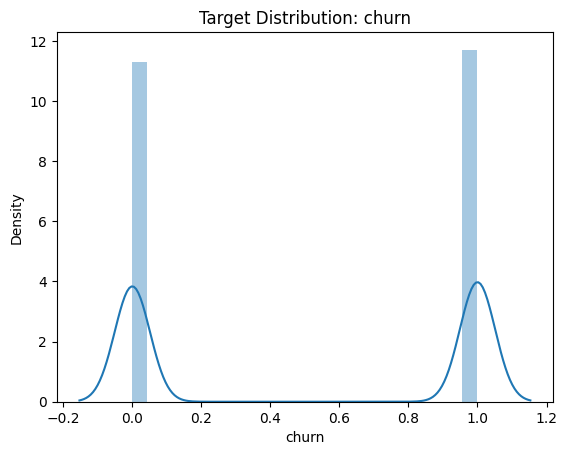

In [65]:
sns.distplot(y)
plt.title('Target Distribution: '+target)
plt.show()

<Axes: xlabel='churn', ylabel='Count'>

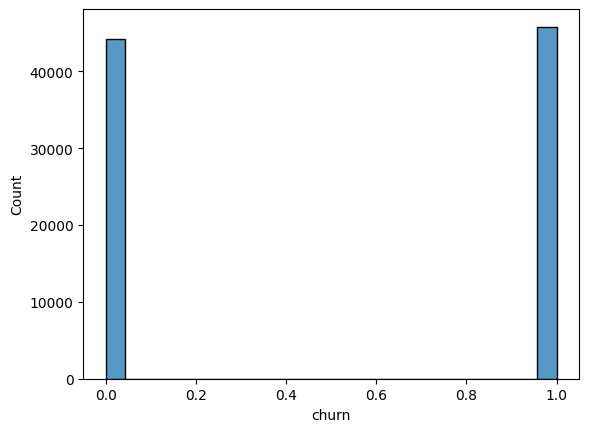

In [66]:
sns.histplot(df[TARGET])

In [67]:
y.describe().T

count    90000.000000
mean         0.508889
std          0.499924
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn, dtype: float64

In [68]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
rev,90000.0,58.297045,46.051612,-5.8625,33.0475,47.6675,70.12375,3843.2625
mou,90000.0,504.046754,515.820398,0.0,148.75,349.0,688.0625,12206.75
totmrc,90000.0,45.879343,23.353056,-26.915,30.0,44.99,59.99,409.99
da,90000.0,0.876874,2.172182,0.0,0.0,0.2475,0.7425,159.39
ovrmou,90000.0,40.741953,96.909654,0.0,0.0,2.5,41.25,4320.75
...,...,...,...,...,...,...,...,...
area_ENCOD_MIDWEST,90000.0,0.213211,0.409578,0.0,0.0,0.0,0.0,1.0
area_ENCOD_NORTHEAST,90000.0,0.056556,0.230993,0.0,0.0,0.0,0.0,1.0
area_ENCOD_SOUTH,90000.0,0.234656,0.423786,0.0,0.0,0.0,0.0,1.0
area_ENCOD_SOUTHWEST,90000.0,0.199567,0.399677,0.0,0.0,0.0,0.0,1.0


# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

In [69]:
# Check de la distribución en % de las clases en tus conjuntos de datos

y.value_counts() / X.shape[0]


1    0.508889
0    0.491111
Name: churn, dtype: float64

# Split TRAIN-TEST

In [70]:
# Calculando los tamaños para un split personalizado de entrenamiento y prueba basado en un test_rate2 del 20&

test_rate = 0.2
total_rows = len(y)
test_size = int(test_rate*total_rows)
train_size = total_rows - test_size

# Verificación de las formas de los conjuntos resultantes

print('TRAIN-VALIDA-LINEAL: %d (%.1f%%)' %(train_size,(100-test_rate*100)))
print('TEST: %d (%.1f%%)' %(test_size,(test_rate*100)))

TRAIN-VALIDA-LINEAL: 72000 (80.0%)
TEST: 18000 (20.0%)


In [71]:
X_train = X.head(train_size)
y_train = y.head(train_size)
X_test = X.tail(test_size)
y_test = y.tail(test_size)

In [72]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 72000
Test set size: 18000


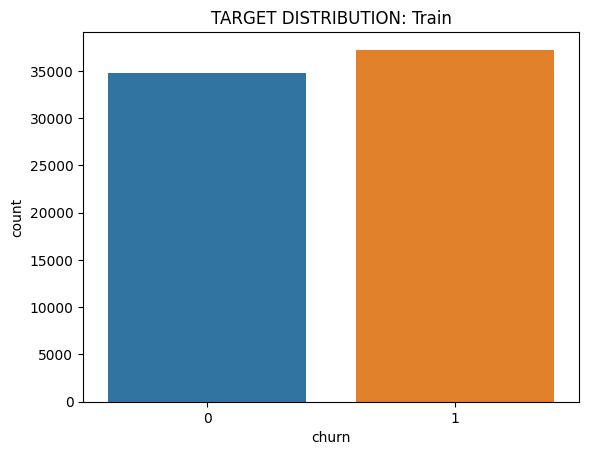

In [73]:
sns.countplot(x=y_train)
plt.title('TARGET DISTRIBUTION: Train')
plt.show()

# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

In [74]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data = X_train_std, columns=X_train.columns, index=X_train.index)    #la funcion scaler nos devuelve un numpy.matrix, le devolvemos el formato de dataframe


In [75]:
X_train.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,asl_flag_BOOL,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,ownrent_U,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,creditcd_U,creditcd_Y,area_ENCOD_MID-ATLANTIC,area_ENCOD_MIDWEST,area_ENCOD_NORTHEAST,area_ENCOD_SOUTH,area_ENCOD_SOUTHWEST,area_ENCOD_WEST
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272.0,116.0,30.0,322.0,136.0,38.0,149.98999,2,2,15,1,4,3,361,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305.0,158.0,40.0,477.0,275.0,48.0,99.98999,7,6,1,1,5,1,240,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12.0,7.0,17.0,11.0,6.0,17.0,29.98999,2,1,7,2,5,2,1504,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8.0,3.0,38.0,50.0,25.0,40.0,29.98999,1,1,6,4,6

In [76]:
X_train_std

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,asl_flag_BOOL,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,dualband_N,dualband_T,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,ownrent_U,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,creditcd_U,creditcd_Y,area_ENCOD_MID-ATLANTIC,area_ENCOD_MIDWEST,area_ENCOD_NORTHEAST,area_ENCOD_SOUTH,area_ENCOD_SOUTHWEST,area_ENCOD_WEST
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,-0.731686,-0.522206,-0.959997,-0.289051,-0.412146,-0.432653,-0.431172,-0.072852,-0.077582,-0.536718,-0.336790,-0.580001,-0.036728,-0.310227,-0.024825,-0.535660,-0.056015,-0.555979,-0.089825,-0.122596,-0.020887,-0.509654,-0.089144,-0.293497,-0.343302,-0.329679,-0.189960,-0.259454,-0.482674,-0.078368,-0.055173,-0.706083,-0.575205,-0.475670,-0.433435,-0.279660,-0.082949,-0.183929,-0.08311,-0.423400,-0.081576,-0.420987,-0.065547,-0.555995,-0.557377,-0.511418,-0.023313,-0.256763,4.474017,0.390373,-0.550325,-0.388966,-0.450789,0.350527,0.378171,-0.458305,-0.393892,-0.781328,-0.890277,-0.816410,-0.424363,-0.312164,-0.615464,-0.333243,-0.207548,-0.496371,0.910960,0.065000,0.386727,2.254634,-1.085260,-0.987286,3.164220,-0.292250,-0.294355,-0.438531,0.777560,-0.524116,1.956197,-0.738442,-0.227295,-0.366818,-0.138597,-0.282976,-0.18324,-0.247156,-0.184330,0.294355,-0.294355,-0.448085,-0.217563,1.414656,-0.415452,-0.665909,-0.572603,-0.154708,0.612064,0.438689,-0.438689,-0.385843,-0.445065,0.646740,0.704854,-0.142045,-0.673633,-0.499262,0.991398,-0.648662,-0.238692,-0.280939,-0.688754,2.132068,-0.767795,-0.220003,-0.184934,1.185958,-0.131507,-0.383250,-0.735009,1.023612,-0.238302,-0.123982,-0.122004,-0.111810,-0.754595,-0.120114,-0.150128,-0.255001,-0.391053,-0.203459,-0.177535,1.404983,-0.213434,-0.10404,-0.384821,-0.377412,-0.214464,-0.630424,-0.118135,0.651797,-0.410359,-0.515494,-0.244583,-0.542698,-0.507087,2.317810
1000002,-0.021018,-0.006525,-0.331593,-0.289051,-0.182532,-0.132909,-0.127094,-0.072852,-0.077582,2.022548,0.978955,0.328013,-0.036728,-0.277230,-0.024825,0.991485,-0.056015,0.827459,-0.089825,0.188871,-0.020887,0.775930,-0.089144,0.041478,0.203552,0.236515,0.444808,0.085138,-0.085467,-0.078368,-0.319090,0.672740,-0.055751,-0.076313,-0.339096,-0.032663,-0.082949,-0.456532,-0.08311,1.112715,-0.081576,0.112299,-0.065547,-0.005693,0.817935,0.764712,-0.023313,0.759236,3.907352,-0.489368,-0.550325,2.698207,1.874201,1.826340,1.916649,1.895950,2.723544,-0.160873,0.085148,0.605114,-0.360788,-0.094063,-0.403100,-0.013502,0.553946,-0.252592,0.098924,3.628256,4.585055,-1.191851,-1.085260,-0.462758,-0.556932,-0.746942,-0.294355,2.280340,-1.286074,-0.524116,-0.511196,-0.738442,-0.227295,-0.366818,-0.138597,-0.282976,-0.18324,4.046026,-0.184330,0.294355,-0.294355,-0.448085,-0.217563,-0.706886,-0.415452,1.501706,1.746

# TRAIN-VALIDA

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [79]:
# # Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y

def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y

def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [80]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

def evaluate_classification_list(model_list, X, y, label=None):
  for i in model_list:
    if label is None:
      label=str(i.str())
    label_.append(label)

    auc_train = auc(i,X,y)
    auc_valida = auc_cross_validation(i,X,y)
    auc_train_.append(auc_train)
    auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

**- Logistic Regression**

In [82]:
# Entrenamos con método lineal
evaluate_classification(model = LogisticRegression(), X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.630874,0.62024


**- Random Forest**

In [83]:
# Entrenamos con método reglas
evaluate_classification(model = RandomForestClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.630874,0.620240
1,RandomForestClassifier(),1.000000,0.614042


**- XGB Classifier**

In [84]:
# Entrenamos con método reglas
evaluate_classification(model = XGBClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
1,RandomForestClassifier(),1.000000,0.614042


**- LGBM Classifier**

In [85]:
# Entrenamos con método reglas
evaluate_classification(model = LGBMClassifier(), X=X_train, y=y_train)

[LightGBM] [Info] Number of positive: 37238, number of negative: 34762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14682
[LightGBM] [Info] Number of data points in the train set: 72000, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517194 -> initscore=0.068805
[LightGBM] [Info] Start training from score 0.068805
[LightGBM] [Info] Number of positive: 27928, number of negative: 26072
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14553
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 146
[LightGBM] [Info

,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.740724,0.625604
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
1,RandomForestClassifier(),1.000000,0.614042


**- AdaBoostClassifier**

In [89]:
evaluate_classification(model = AdaBoostClassifier(), X=X_train, y=y_train)


,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.740724,0.625604
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
1,RandomForestClassifier(),1.000000,0.614042
4,AdaBoostClassifier(),0.649367,0.602291


 **- GradientBoostingClassifier**

In [90]:
evaluate_classification(model = GradientBoostingClassifier(), X=X_train, y=y_train)


,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.740724,0.625604
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
5,GradientBoostingClassifier(),0.677691,0.617911
1,RandomForestClassifier(),1.000000,0.614042
4,AdaBoostClassifier(),0.649367,0.602291


**- DecisionTreeClassifier**

In [95]:
evaluate_classification(model = DecisionTreeClassifier(), X=X_train, y=y_train)


,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.740724,0.625604
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
5,GradientBoostingClassifier(),0.677691,0.617911
1,RandomForestClassifier(),1.000000,0.614042
4,AdaBoostClassifier(),0.649367,0.602291
6,DecisionTreeClassifier(),1.000000,0.534344


**- MLPClassifier**

In [97]:
evaluate_classification(model = MLPClassifier(), X=X_train, y=y_train)


,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.740724,0.625604
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
5,GradientBoostingClassifier(),0.677691,0.617911
1,RandomForestClassifier(),1.000000,0.614042
4,AdaBoostClassifier(),0.649367,0.602291
7,MLPClassifier(),0.637078,0.595988
6,DecisionTreeClassifier(),1.000000,0.534344


**- BaggingClassifier**

In [99]:
evaluate_classification(model = BaggingClassifier(), X=X_train, y=y_train)

# Consideraciones

# Sobreajuste: El AUC perfecto (1) en el conjunto de entrenamiento (random forest) puede ser una señal de sobreajuste
# El modelo puede haberse ajustado demasiado a los datos de entrenamiento, lo que resulta en un rendimiento deficiente en datos no vistos

# Generalización: El AUC más bajo en la validación cruzada (lgbm) indica que el modelo lgbm tiene un rendimiento relativamente pobre en la generalización
# a nuevos datos o en diferentes subconjuntos del conjunto de datos.

,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.740724,0.625604
0,LogisticRegression(),0.630874,0.620240
2,"XGBClassifier(base_score=None, booster=None, c...",0.847166,0.619728
5,GradientBoostingClassifier(),0.677691,0.617911
1,RandomForestClassifier(),1.000000,0.614042
4,AdaBoostClassifier(),0.649367,0.602291
7,MLPClassifier(),0.637078,0.595988
8,BaggingClassifier(),0.998963,0.577279
9,BaggingClassifier(),0.999014,0.569721
6,DecisionTreeClassifier(),1.000000,0.534344


from matplotlib import pyplot as plt
_df_0['AUC Train'].plot(kind='hist', bins=20, title='AUC Train')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AUC Cross-Valida'].plot(kind='hist', bins=20, title='AUC Cross-Valida')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='AUC Train', y='AUC Cross-Valida', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AUC Train'].plot(kind='line', figsize=(8, 4), title='AUC Train')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['AUC Cross-Valida'].plot(kind='line', figsize=(8, 4), title='AUC Cross-Valida')
plt.gca().spines[['top', 'right']].set_visible(False)

## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
help(LGBMClassifier)


Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(sklearn.base.ClassifierMixin, LGBMModel)
 |  LGBMClassifier(boosting_type: str = 'gbdt', num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100, subsample_for_bin: int = 200000, objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None, class_weight: Union[Dict, str, NoneType] = None, min_split_gain: float = 0.0, min_child_weight: float = 0.001, min_child_samples: int = 20, subsample: float = 1.0, subsample_freq: int = 0, colsample_bytree: float = 1.0, reg_alpha: float = 0.0, reg_lambda: float = 0.0, random_state: Union[int, numpy.random.mtrand.RandomS

In [103]:
parametros = {'boosting_type':['gbdt','rf','dart'],
              'num_leaves':[10,20,30,40,50,60,70],
              'max_depth':[1,2,4,6,8,10,12,14],
              'learning_rate':[0.1,0.2,0.4,0.6,0.8],
              'n_estimators':[100,200,300,400,500,600,700,800]
}

In [104]:
search_hp = RandomizedSearchCV(estimator=LGBMClassifier(),
                               param_distributions = parametros,
                               scoring='roc_auc',     # metrica a optimizar: roc_auc
                               cv = 4,            # numero de folds para cross-validation
                               n_iter = 20,       # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1,
                               verbose=True)

In [105]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 37238, number of negative: 34762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14682
[LightGBM] [Info] Number of data points in the train set: 72000, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517194 -> initscore=0.068805
[LightGBM] [Info] Start training from score 0.068805


RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'rf', 'dart'],
                                        'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8],
                                        'max_depth': [1, 2, 4, 6, 8, 10, 12,
                                                      14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70]},
                   scoring='roc_auc', verbose=True)

In [106]:
search_hp.best_params_

{'num_leaves': 10,
 'n_estimators': 500,
 'max_depth': 14,
 'learning_rate': 0.2,
 'boosting_type': 'dart'}

In [107]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best roc_auc:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

# El diccionario best_params_ muestra la combinación específica de hiperparámetros que lograron el mejor rendimiento
# Son los valores para num_leaves, n_estimators, max_depth, learning_rate y boosting_type

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(boosting_type='dart', learning_rate=0.2, max_depth=14,
               n_estimators=500, num_leaves=10)

 The best roc_auc: 0.6327507913066988

 The best parameters across ALL searched params:
 {'num_leaves': 10, 'n_estimators': 500, 'max_depth': 14, 'learning_rate': 0.2, 'boosting_type': 'dart'}


## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que hanfuncionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [108]:
model = search_hp.best_estimator_

In [109]:
CWD = os.getcwd()

DATA_PATH = os.path.join(CWD, r"/content/drive/MyDrive/NUCLIO/Machine Learning/Segundo entregable - ML/EJERCICIO-ML-Sup")

pickle.dump(model, open(os.path.join(DATA_PATH, 'classifier.pkl'), 'wb'))



# TEST

* Evaluación de las métricas de performance en TEST.

In [110]:
y_train_pred = model.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [111]:
y_train_pred_proba = model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = model.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

AUC

In [112]:
from sklearn.metrics import roc_auc_score

In [113]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST

In [114]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

# Interpretación:

# Las métricas AUC de train y test son comparables y cercanas,
# indica que el modelo no está memorizando los datos de entrenamiento,
# sino que está aprendiendo patrones que son aplicables a datos no vistos (test)

AUC Train: 0.7364
AUC Test: 0.723


* ROC Curve

In [115]:
from sklearn.metrics import roc_curve

In [116]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

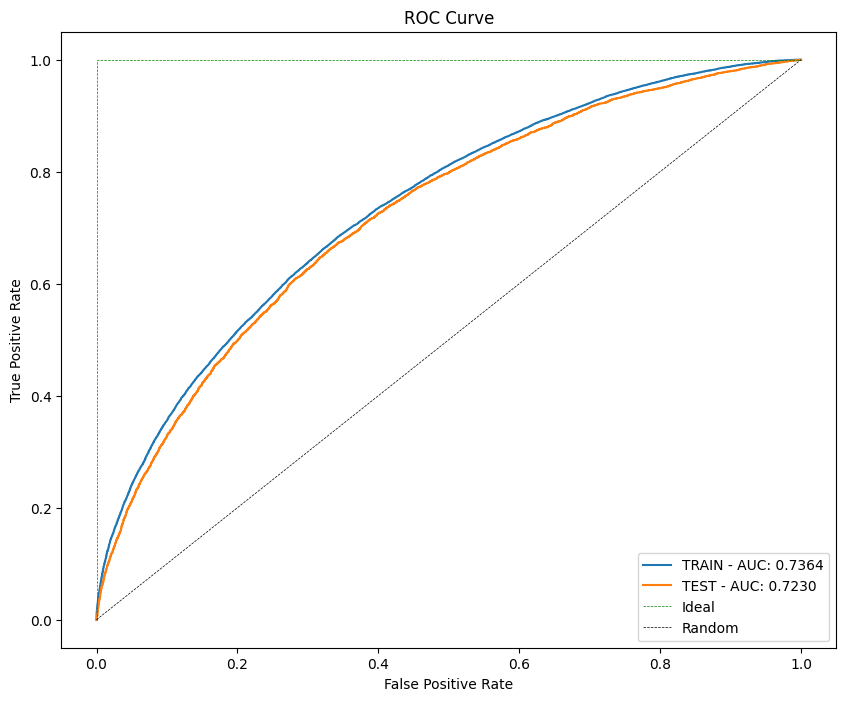

In [117]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Interpretación:

# Las curvas ROC y las métricas de AUC para (train) y (test)
# son cercanas y tengan valores similares sugiere que el modelo está generalizando
# bien y no está sobreajustando (overfitting) los datos de entrenamiento

* Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [119]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

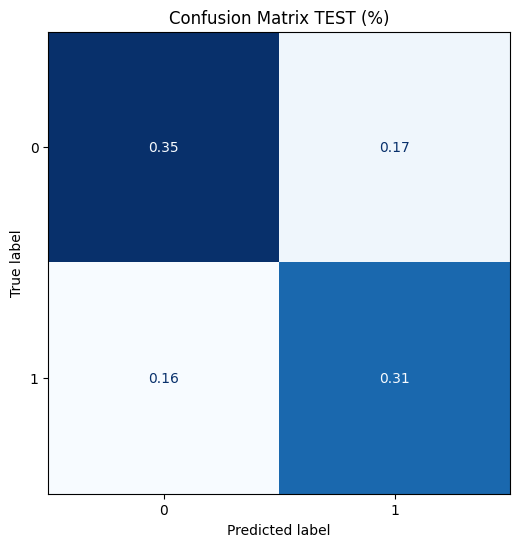

In [120]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

* Accuracy, Precision, Recall y F1-Score

In [121]:
cm_test

array([[6357, 3081],
       [2949, 5613]])

In [122]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [123]:
# Rellenar
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [124]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.665
Precision: 0.6456
Recall: 0.6556
F1-score: 0.6506


In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.665
Precision: 0.6456
Recall: 0.6556
F1-score: 0.6506


# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.
* Comentar las top5 features, su impacto en el target y extraer insights.
* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

In [127]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.4 MB/s eta 0:00:00


In [128]:
import shap


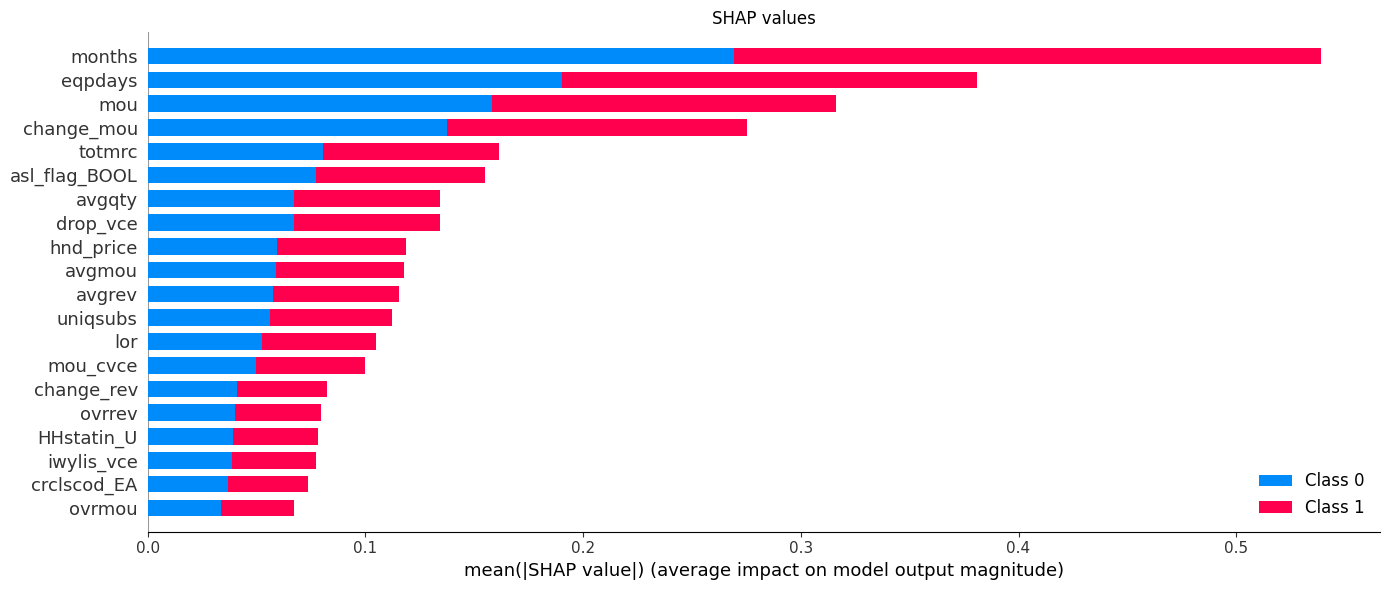

In [130]:
#SHAP value: peso en el output final

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20, plot_size=[14,6])

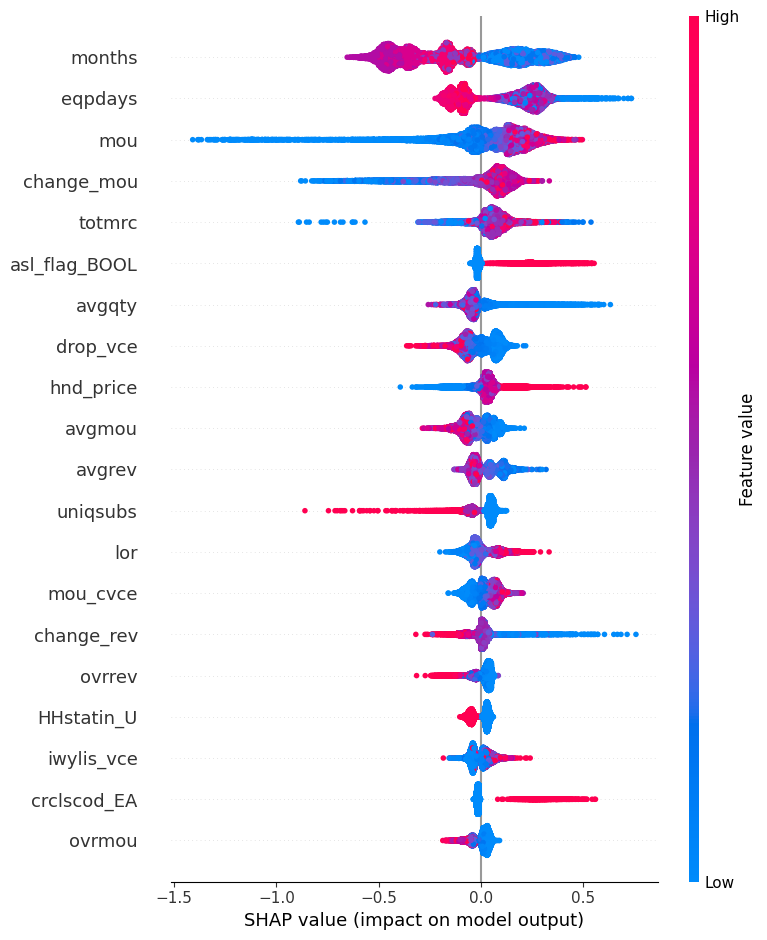

In [131]:
# impacto en churn en mes + 1 = 0 (no churn)
# shap_values[0]

shap.summary_plot(shap_values[0], X_test, show = False)

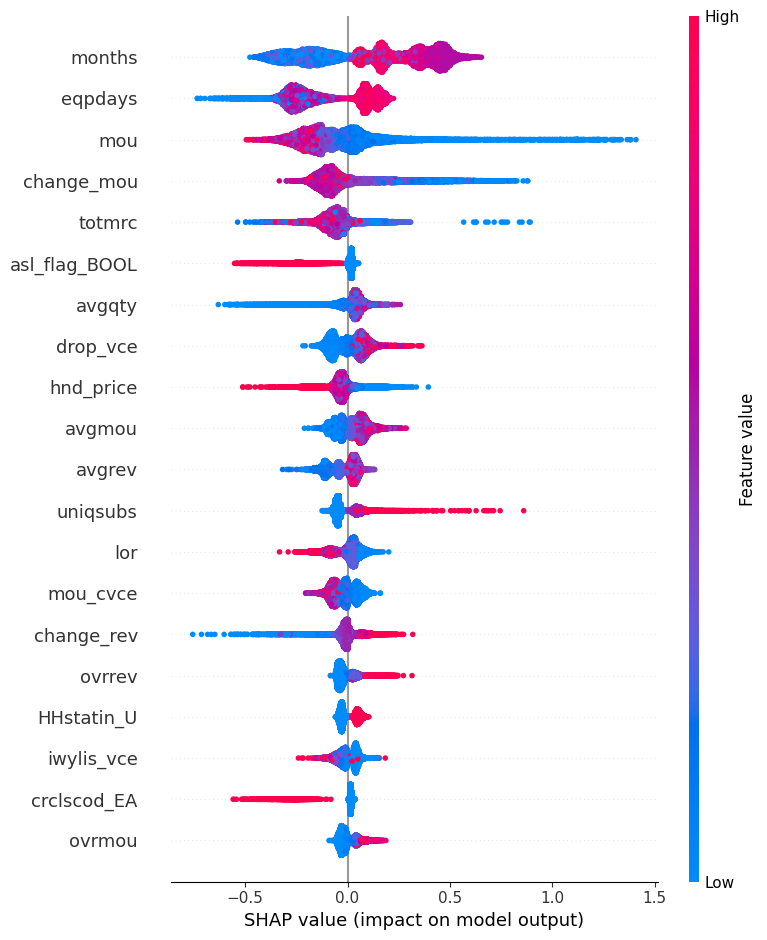

In [132]:
# impacto en churn en mes + 1 = 1 (churn)
# shap_values[1]

shap.summary_plot(shap_values[1], X_test, show = False)